## 1. Install packages

In [1]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.48  Python-3.11.9 torch-2.5.1+cpu CPU (Intel Core(TM) i7-10875H 2.30GHz)
Setup complete  (16 CPUs, 31.8 GB RAM, 155.7/237.9 GB disk)


In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## 2. Test Yolov8

In [5]:
# Run inference on an image with YOLOv8n
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

Ultralytics 8.3.48 🚀 Python-3.11.9 torch-2.5.1+cpu CPU (Intel Core(TM) i7-10875H 2.30GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 c:\Users\DUC TAI DZ\Desktop\Yolo_research-master\zidane.jpg: 384x640 2 persons, 1 tie, 94.3ms
Speed: 4.0ms preprocess, 94.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict20
💡 Learn more at https://docs.ultralytics.com/modes/predict


### Run prediction

In [6]:
model = YOLO("yolov8n.pt")
results = model("https://ultralytics.com/images/bus.jpg")


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 c:\Users\DUC TAI DZ\Desktop\Yolo_research-master\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 112.2ms
Speed: 5.0ms preprocess, 112.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


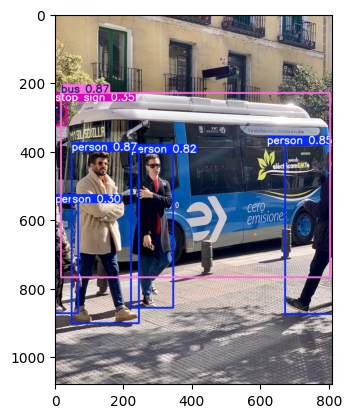

In [7]:
res = results[0].plot()
img = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## 3. Get data

In [8]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="xTst9bjGE20I0ulPMV30")
# project = rf.workspace("seminar-object-detection").project("cars-o1ljf")
# dataset = project.version(1).download("yolov8")


## 4. Train model

### 4.1. Load model and data

In [9]:
model = YOLO("yolov8n.pt")

In [13]:
model.train(data="C:/Users/DUC TAI DZ/Desktop/Yolo_research-master/data2/data.yaml", epochs=10)


New https://pypi.org/project/ultralytics/8.3.53 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.48  Python-3.11.9 torch-2.5.1+cpu CPU (Intel Core(TM) i7-10875H 2.30GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/DUC TAI DZ/Desktop/Yolo_research-master/data2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mas

KeyboardInterrupt: 

## 5. Prediction values

In [10]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [11]:
model = YOLO(r"C:\Users\DUC TAI DZ\Desktop\Yolo_research-master\runs\detect\train8\weights\best.pt")


In [18]:
from ultralytics import YOLO
import cv2
import os

# Đường dẫn mô hình và ảnh đầu vào
model_path = r"C:\Users\DUC TAI DZ\Desktop\Yolo_research-master\runs\detect\train8\weights\best.pt"
input_image_path = r"C:\Users\DUC TAI DZ\Desktop\Yolo_research-master\giaothongvantai.jpg"

# Kiểm tra sự tồn tại của tệp mô hình và ảnh
if not os.path.exists(model_path):
    print(f"Lỗi: Tệp mô hình không tồn tại tại {model_path}")
    exit()
if not os.path.exists(input_image_path):
    print(f"Lỗi: Ảnh đầu vào không tồn tại tại {input_image_path}")
    exit()

# Tải mô hình
model = YOLO(model_path)

# Chạy mô hình trên ảnh
results = model(input_image_path)

# Hiển thị kết quả phát hiện
for result in results:
    # In thông tin các hộp giới hạn
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0]  # Tọa độ hộp
        confidence = box.conf[0]     # Độ tin cậy
        label = int(box.cls[0])      # Nhãn lớp

        print(f"Label: {label}, Confidence: {confidence:.2f}, Box: [{x1:.2f}, {y1:.2f}, {x2:.2f}, {y2:.2f}]")

    # Lấy ảnh đã chú thích kết quả (bounding boxes)
    annotated_image = result.plot()

    # Hiển thị ảnh kết quả
    cv2.imshow("Kết quả phát hiện", annotated_image)
    cv2.waitKey(0)  # Chờ nhấn phím bất kỳ để đóng cửa sổ
    cv2.destroyAllWindows()



image 1/1 C:\Users\DUC TAI DZ\Desktop\Yolo_research-master\giaothongvantai.jpg: 448x640 2 buss, 6 cars, 1 person, 89.3ms
Speed: 4.5ms preprocess, 89.3ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
Label: 0, Confidence: 0.90, Box: [33.07, 206.76, 133.51, 310.90]
Label: 1, Confidence: 0.80, Box: [133.76, 181.42, 191.69, 242.61]
Label: 1, Confidence: 0.77, Box: [401.57, 235.05, 457.10, 299.01]
Label: 0, Confidence: 0.63, Box: [322.63, 183.64, 379.19, 266.34]
Label: 1, Confidence: 0.58, Box: [186.27, 222.63, 222.20, 254.19]
Label: 1, Confidence: 0.46, Box: [277.26, 175.03, 304.44, 206.88]
Label: 3, Confidence: 0.34, Box: [208.96, 138.55, 233.86, 177.70]
Label: 1, Confidence: 0.32, Box: [342.54, 265.63, 394.21, 320.05]
Label: 1, Confidence: 0.25, Box: [289.43, 135.95, 309.99, 161.20]


In [17]:
import cv2

# Define video and model paths
input_video_path = r"C:\Users\DUC TAI DZ\Desktop\Yolo_research-master\gettyimages-1194498762-640_adpp.mp4"
output_video_path = r"C:\Users\DUC TAI DZ\Desktop\Yolo_research-master\output_video.mp4"
model_path = r"C:\Users\DUC TAI DZ\Desktop\Yolo_research-master\runs\detect\train8\weights\best.pt"

# Load the YOLO model
print("Loading YOLO model...")
model = YOLO(model_path)
print("Model loaded successfully!")

# Open the video capture stream
print("Opening video...")
cap = cv2.VideoCapture(input_video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error opening video!")
    exit()

# Define video writer codec and frame size
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create video writer for output
out = cv2.VideoWriter(output_video_path, fourcc, 30.0, (frame_width, frame_height))

# Main loop for processing video frames
while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()

    # Check if frame reading failed
    if not ret:
        print("No more frames to read from video!")
        break

    # Run object detection on the frame using the YOLO model
    results = model(frame)

    # Extract the annotated frame with bounding boxes
    annotated_frame = results[0].plot()

    # Write the annotated frame to the output video
    out.write(cv2.cvtColor(annotated_frame, cv2.COLOR_RGB2BGR))

    # Display the annotated frame for visualization
    cv2.imshow("Object Detection Results", annotated_frame)

    # Exit loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resourcesimport cv2
from ultralytics import YOLO

# Đường dẫn video và mô hình
input_video_path = r"C:\Users\DUC TAI DZ\Desktop\Yolo_research-master\gettyimages-1194498762-640_adpp.mp4"
output_video_path = r"C:\Users\DUC TAI DZ\Desktop\Yolo_research-master\output_video.mp4"
model_path = r"C:\Users\DUC TAI DZ\Desktop\Yolo_research-master\runs\detect\train8\weights\best.pt"

# Tải mô hình YOLO
print("Đang tải mô hình YOLO...")
model = YOLO(model_path)
print("Tải mô hình thành công!")

# Mở luồng video
print("Mở video...")
cap = cv2.VideoCapture(input_video_path)

# Kiểm tra nếu mở video thất bại
if not cap.isOpened():
    print("Lỗi khi mở video!")
    exit()

# Định nghĩa codec và kích thước khung hình
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Tạo video writer cho đầu ra
out = cv2.VideoWriter(output_video_path, fourcc, 30.0, (frame_width, frame_height))

# Xử lý từng khung hình
while cap.isOpened():
    # Đọc từng khung hình
    ret, frame = cap.read()

    # Thoát nếu không còn khung hình
    if not ret:
        print("Hết khung hình trong video!")
        break

    # Phát hiện đối tượng bằng mô hình YOLO
    results = model(frame)

    # Lấy khung hình đã được gắn nhãn (bounding boxes)
    annotated_frame = results[0].plot()

    # Ghi khung hình đã gắn nhãn vào video đầu ra
    out.write(cv2.cvtColor(annotated_frame, cv2.COLOR_RGB2BGR))

    # Hiển thị khung hình kết quả
    cv2.imshow("Kết quả nhận diện", annotated_frame)

    # Kiểm tra nếu nhấn phím 'q' hoặc đóng cửa sổ
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q') or cv2.getWindowProperty('Kết quả nhận diện', cv2.WND_PROP_VISIBLE) < 1:
        print("Video đã được dừng!")
        break

# Giải phóng tài nguyên
cap.release()
out.release()
cv2.destroyAllWindows()

print("Xử lý video hoàn tất!")

cap.release()
out.release()
cv2.destroyAllWindows()

print("Finished processing video!")

Loading YOLO model...
Model loaded successfully!
Opening video...

0: 384x640 9 cars, 87.1ms
Speed: 4.0ms preprocess, 87.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 cars, 72.8ms
Speed: 5.0ms preprocess, 72.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 cars, 67.3ms
Speed: 3.0ms preprocess, 67.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 68.8ms
Speed: 3.0ms preprocess, 68.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 66.3ms
Speed: 3.0ms preprocess, 66.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 65.8ms
Speed: 3.0ms preprocess, 65.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 65.8ms
Speed: 2.0ms preprocess, 65.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 69.3ms
Speed: 3.0ms preprocess, 69.3ms inferen

KeyboardInterrupt: 

In [9]:
results =model.predict(show=True,source="0")


1/1: 0... Success  (inf frames of shape 640x480 at 30.00 FPS)


WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 480x640 1 bus, 84.3ms
0: 480x640 1 bus, 72.6ms
0: 480x640 1 bus, 70.0ms
0: 480x640 (no detections), 74.9ms
0: 480x640 (no detections), 69.9ms
0: 480x640 (no detections), 72.1ms
0: 480x640 (no detections), 75.8ms
0: 480x640 1 bus, 74.8ms
0: 480x640 1 bus, 76.9ms
0: 480x640 1 bus, 69.9ms
0: 480x640 1 bus, 69.2ms
0: 480x640 (no detections), 70.5ms
0: 480x640 1 bus, 69.8ms
0: 480x640 1 bus, 65

KeyboardInterrupt: 

## 6. Export

Export a YOLOv8 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLOv8 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://onnx.ai/) or [OpenVINO](https://docs.openvino.ai/latest/index.html) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://developer.nvidia.com/tensorrt) for up to 5x GPU speedup.


| Format                                                             | `format` Argument | Model                     | Metadata | Arguments                                           |
|--------------------------------------------------------------------|-------------------|---------------------------|----------|-----------------------------------------------------|
| [PyTorch](https://pytorch.org/)                                    | -                 | `yolov8n.pt`              | ✅        | -                                                   |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)            | `torchscript`     | `yolov8n.torchscript`     | ✅        | `imgsz`, `optimize`                                 |
| [ONNX](https://onnx.ai/)                                           | `onnx`            | `yolov8n.onnx`            | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `opset`     |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)             | `openvino`        | `yolov8n_openvino_model/` | ✅        | `imgsz`, `half`                                     |
| [TensorRT](https://developer.nvidia.com/tensorrt)                  | `engine`          | `yolov8n.engine`          | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `workspace` |
| [CoreML](https://github.com/apple/coremltools)                     | `coreml`          | `yolov8n.mlpackage`       | ✅        | `imgsz`, `half`, `int8`, `nms`                      |
| [TF SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`     | `yolov8n_saved_model/`    | ✅        | `imgsz`, `keras`                                    |
| [TF GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`              | `yolov8n.pb`              | ❌        | `imgsz`                                             |
| [TF Lite](https://www.tensorflow.org/lite)                         | `tflite`          | `yolov8n.tflite`          | ✅        | `imgsz`, `half`, `int8`                             |
| [TF Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`         | `yolov8n_edgetpu.tflite`  | ✅        | `imgsz`                                             |
| [TF.js](https://www.tensorflow.org/js)                             | `tfjs`            | `yolov8n_web_model/`      | ✅        | `imgsz`                                             |
| [PaddlePaddle](https://github.com/PaddlePaddle)                    | `paddle`          | `yolov8n_paddle_model/`   | ✅        | `imgsz`                                             |
| [ncnn](https://github.com/Tencent/ncnn)                            | `ncnn`            | `yolov8n_ncnn_model/`     | ✅        | `imgsz`, `half`                                     |


In [ ]:
path = model.export(format="onnx")  # export the model to ONNX format